# How to Train YOLOv8 Object Detection on a Custom Dataset

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Mar 21 16:23:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:02:00.0 Off |                  N/A |
| 43%   49C    P8    10W / 250W |      5MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/workspace/yolov8


!apt-get update && apt-get install libgl1 -y

## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20
!pip install roboflow --quiet

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()




Ultralytics YOLOv8.0.20 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)
Setup complete ✅ (24 CPUs, 47.0 GB RAM, 3.0/10.0 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## [Learn] CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## [Learn] Inference with Pre-trained COCO Model

### [Learn]  💻 CLI - Inference with CLI 


`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### [Learn] 🐍 Python SDK - Option 2

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

## [MAIN PROGRAM] Custom Training

1. Install library
2. Download dataset

#### 1.1 Use Roboflow

#### 1.2 Use the Google Drive

#### 1.3 Use the Local Machine

In [13]:
class Dataset:
    def __init__(self, location):
        self.location = location

dataset = Dataset("/workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0")

Create new fresh training

In [14]:
!rm -rf {HOME}/runs/detect 

In [15]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/workspace/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [16]:
!ls {HOME}/runs/detect/train/

F1_curve.png					    train_batch2.jpg
PR_curve.png					    train_batch2700.jpg
P_curve.png					    train_batch2701.jpg
R_curve.png					    train_batch2702.jpg
args.yaml					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1679415935.c9f656618c56.1564.0  val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/workspace/yolov8


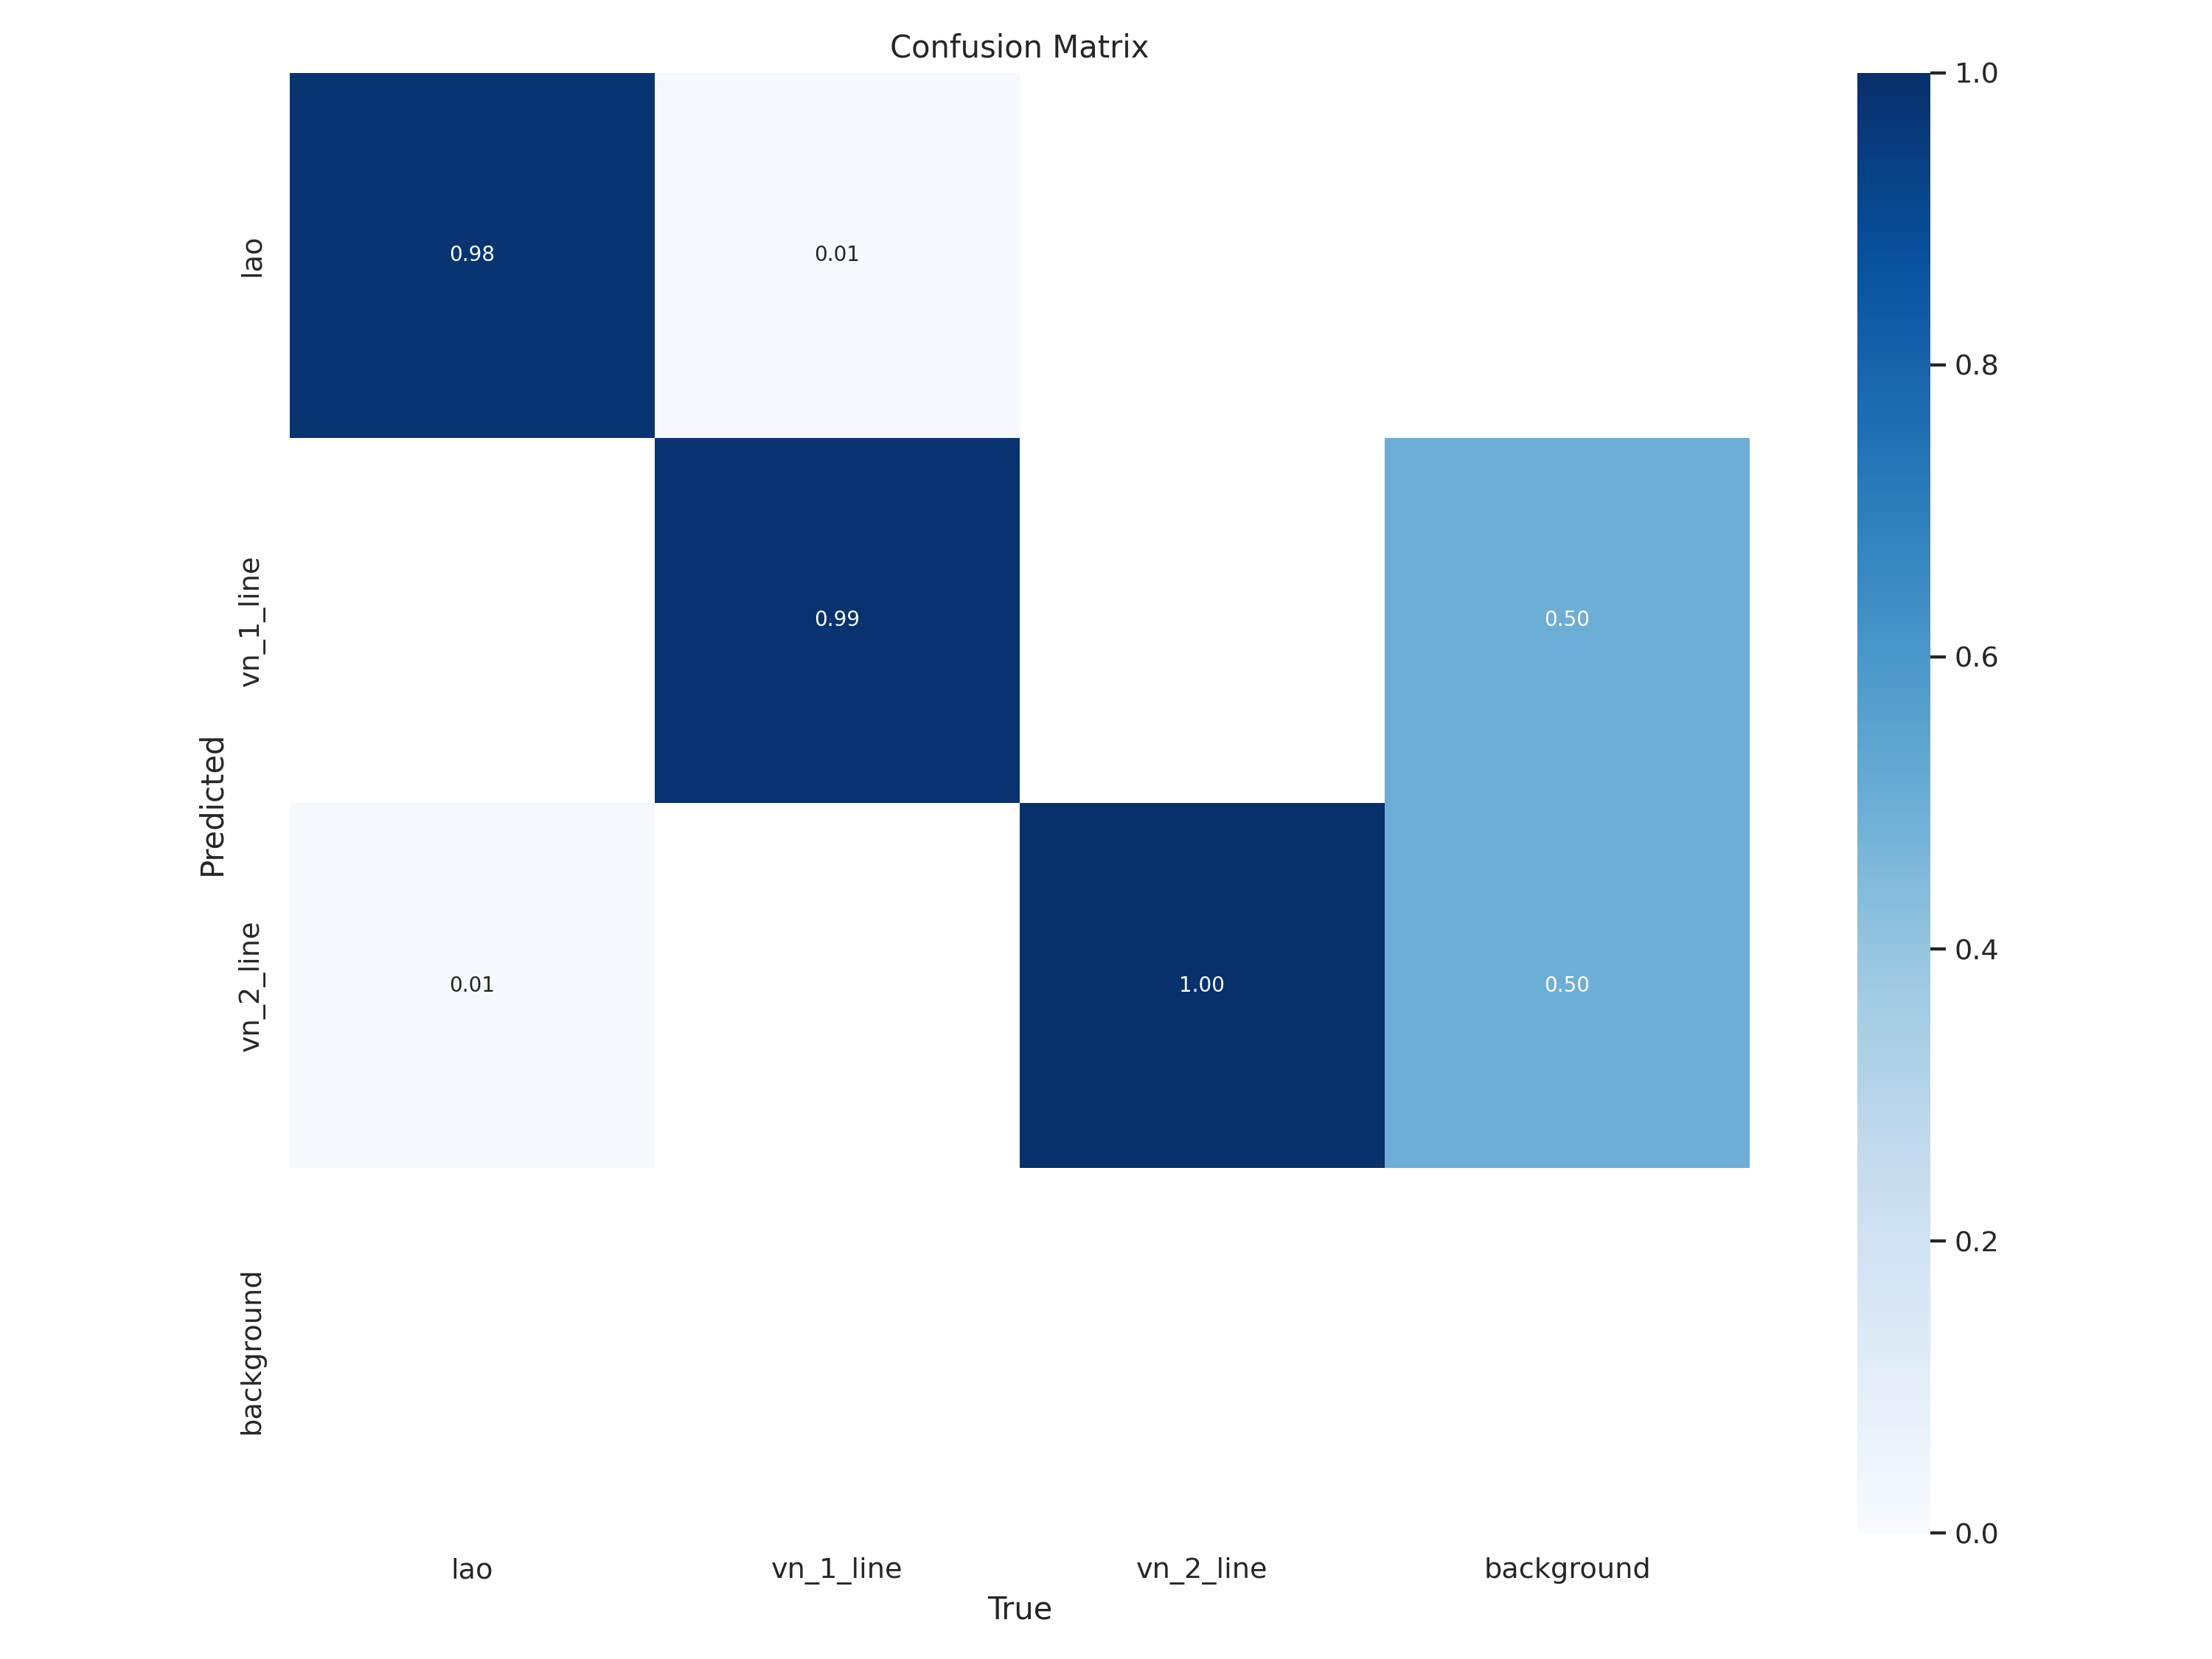

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1200)

/workspace/yolov8


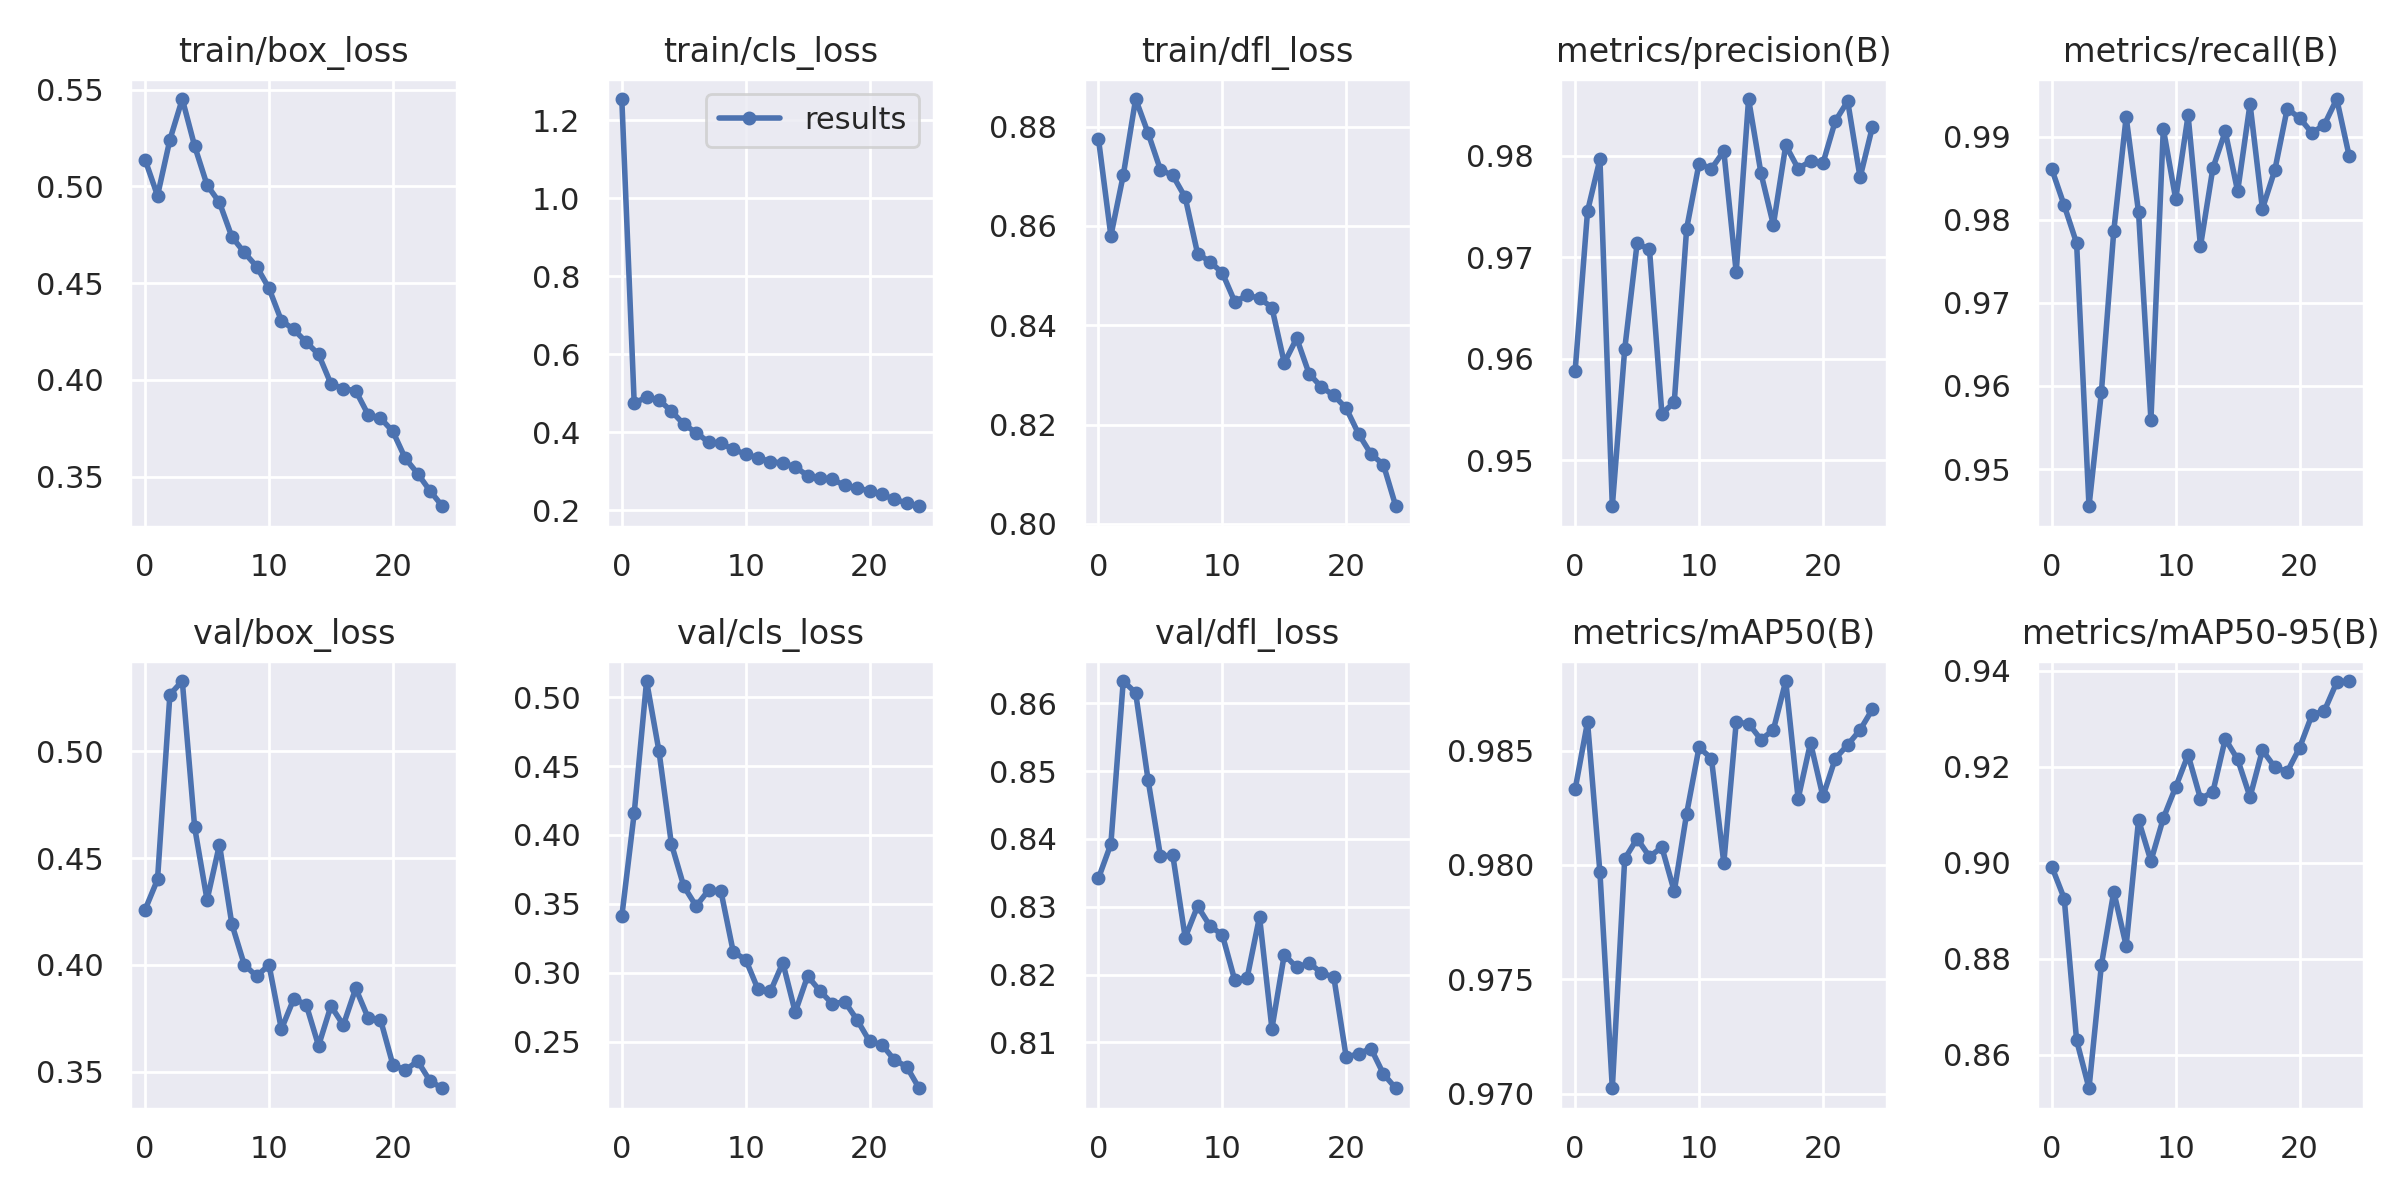

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1200)

/workspace/yolov8


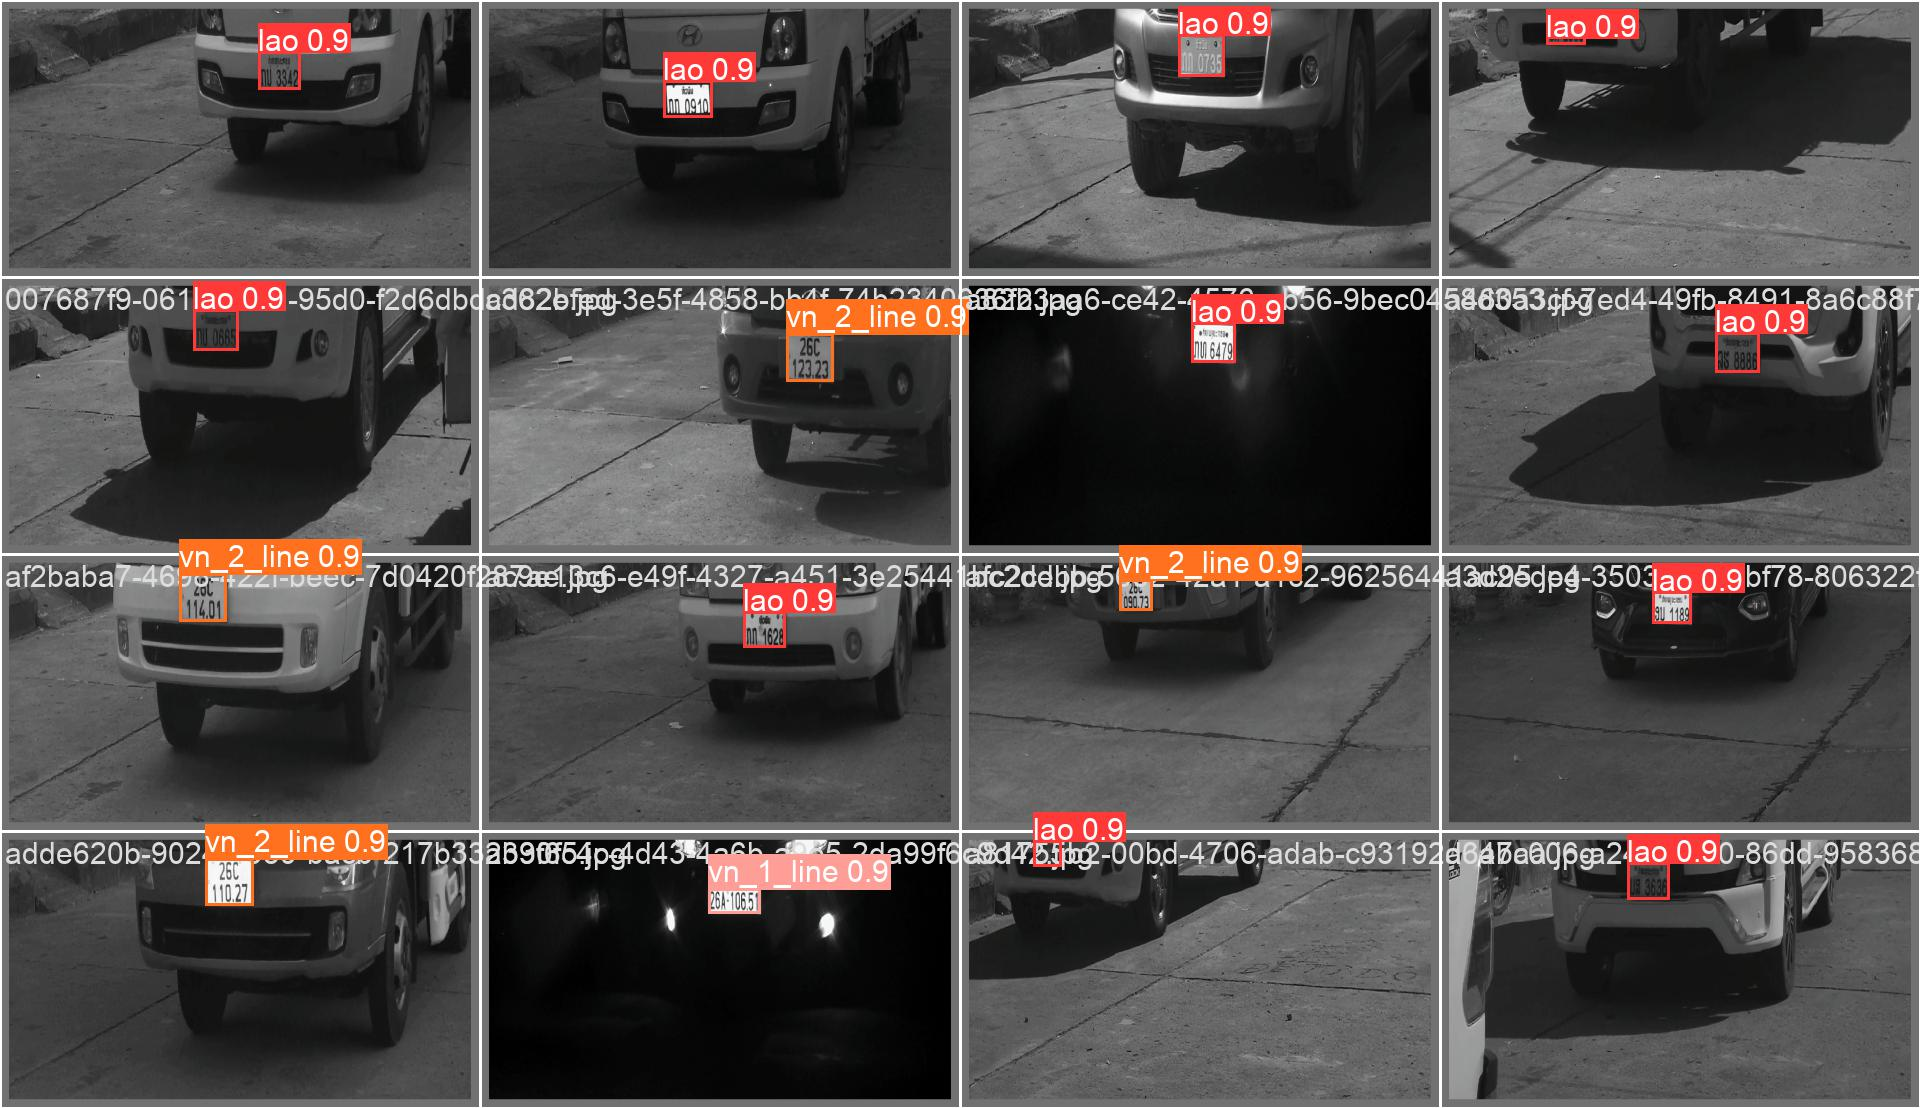

In [20]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [21]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/workspace/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/val
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        362        359      0.983      0.988      0.987      0.939
                   lao        362        215      0.999      0.977      0.992      0.949
             vn_1_line        362         73      0.991      0.986      0.995      0.926
             vn_2_line        362         71      0.959          1      0.974      0.943
Speed: 0.9ms pre-process, 3.6ms inference, 0.0ms loss, 2.6ms post-process per image


## Inference with Custom Model

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/workspace/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/355 /workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images/0007d2ab-526e-4712-821f-d35f3cee5f8c.jpg: 480x800 1 lao, 27.2ms
image 2/355 /workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images/0074fafb-004b-405b-a75e-314de5527b54.jpg: 480x800 1 vn_2_line, 15.6ms
image 3/355 /workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images/00dcf29e-706f-45a8-baf2-6f35f598b329.jpg: 480x800 1 vn_1_line, 15.7ms
image 4/355 /workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images/02e064fa-bf32-4501-a144-6c48a028d9b7.jpg: 480x800 1 lao, 15.5ms
image 5/355 /workspace/yolov8/datasets/LPD_LAO_ChienKhuong_21-03-2023_v1.0/test/images/02f3e62c-b72a-4216-95ad-6a62b382e6db.jpg: 480x800 1 vn_1_line, 15.6ms
image 6/355 /workspace/yolov8

**NOTE:** Let's take a look at few results.

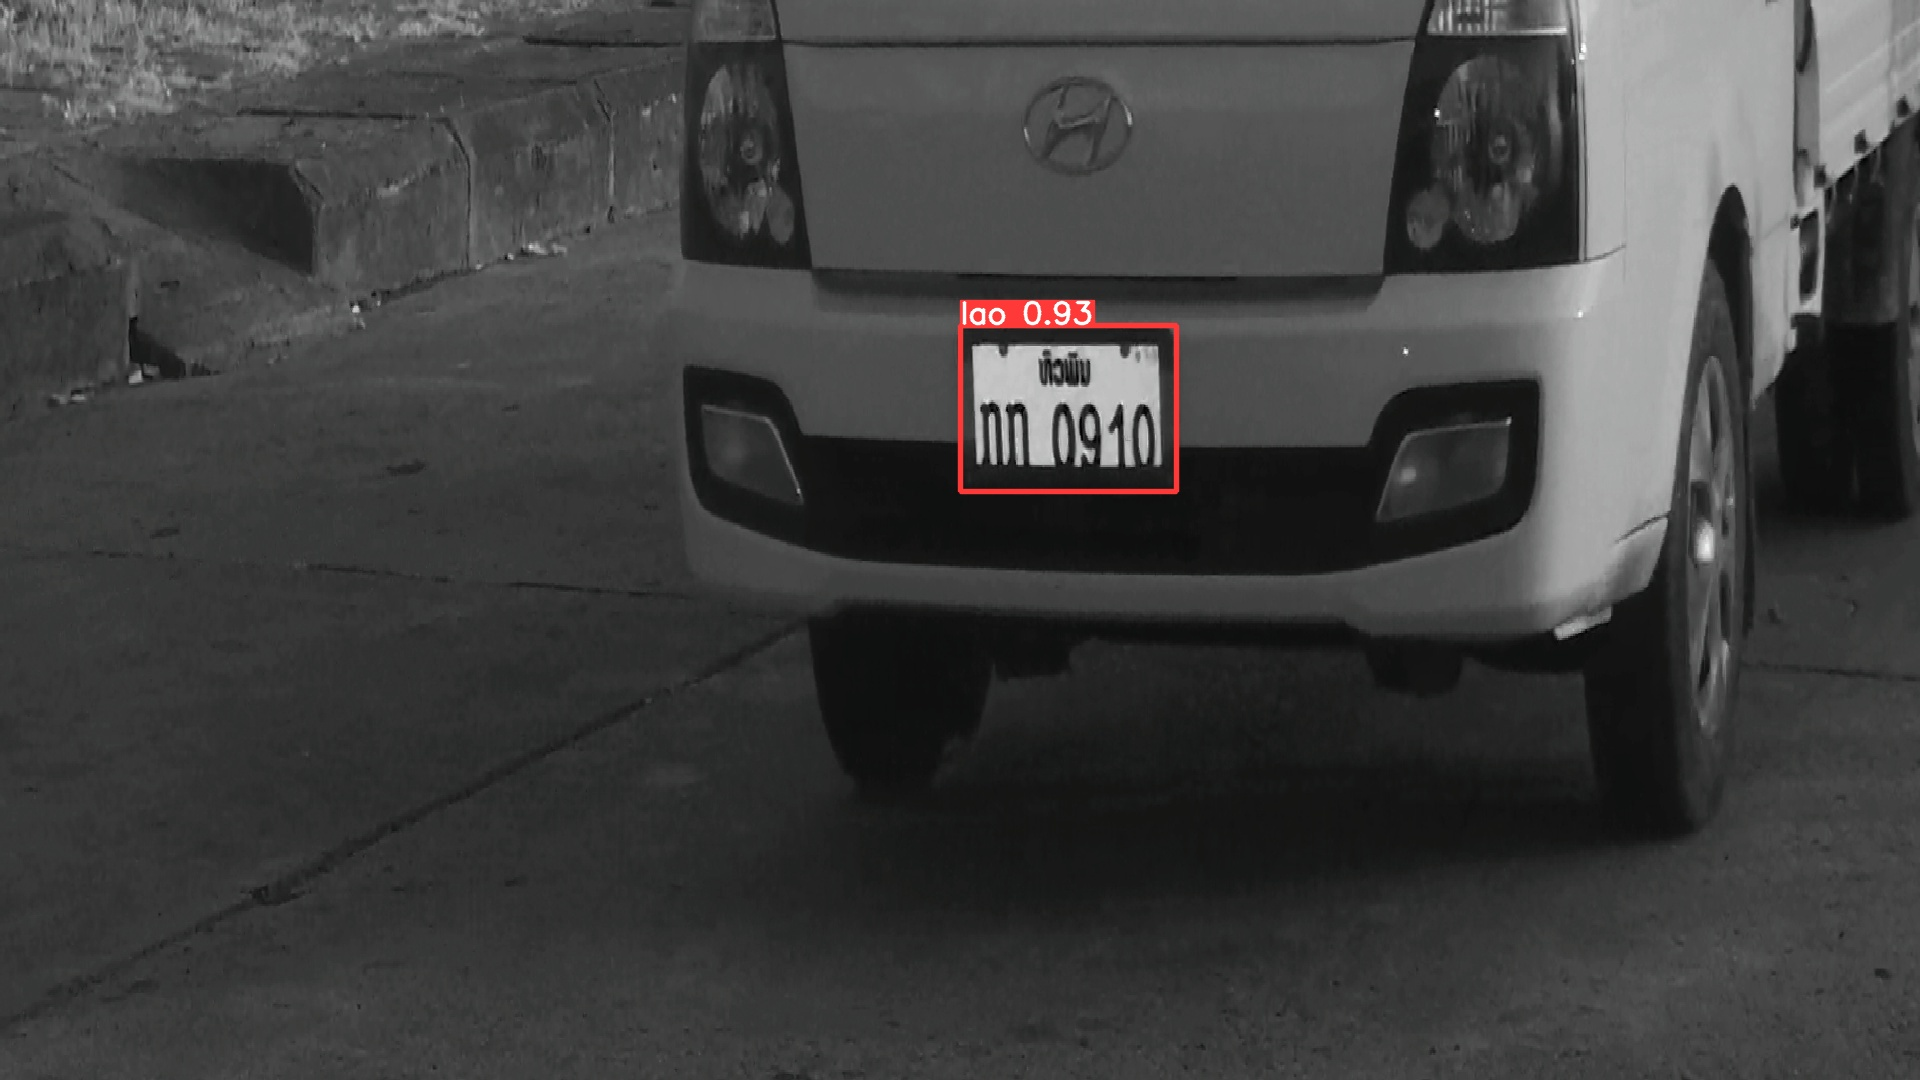

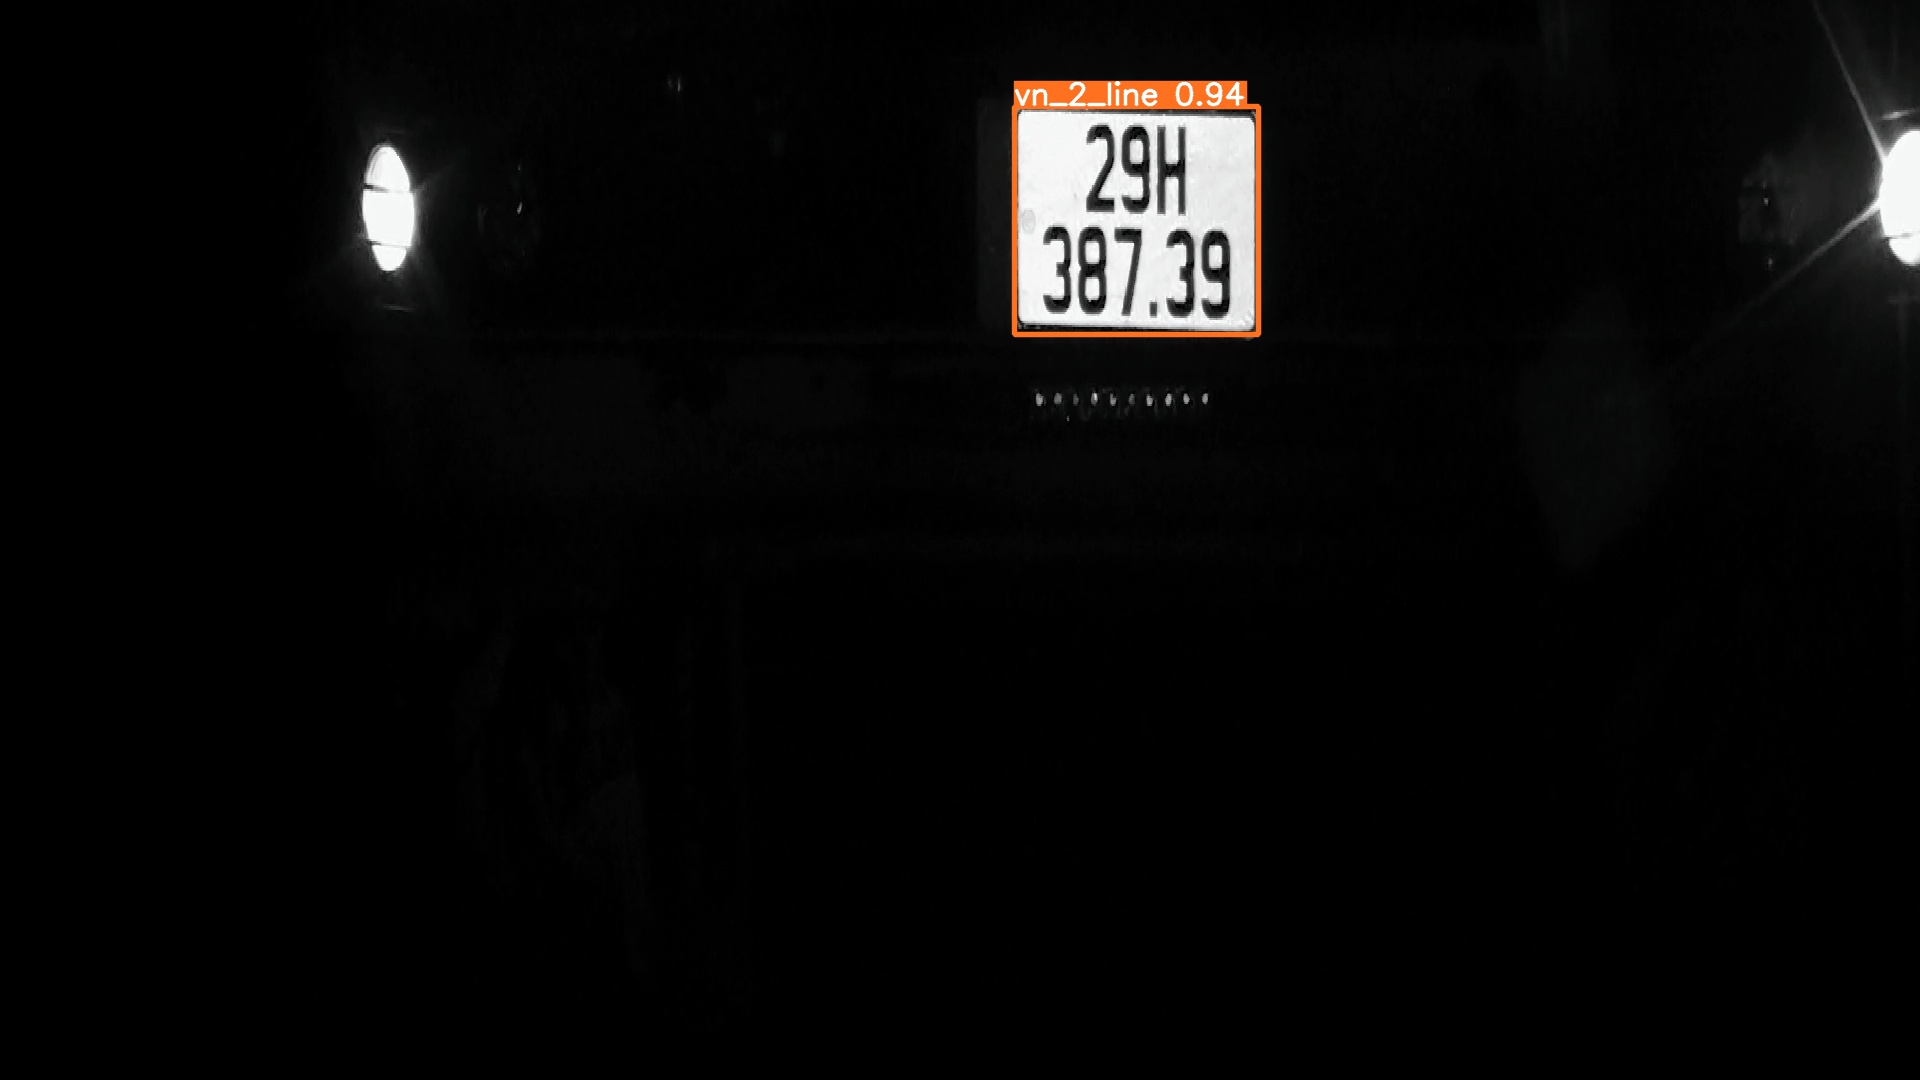

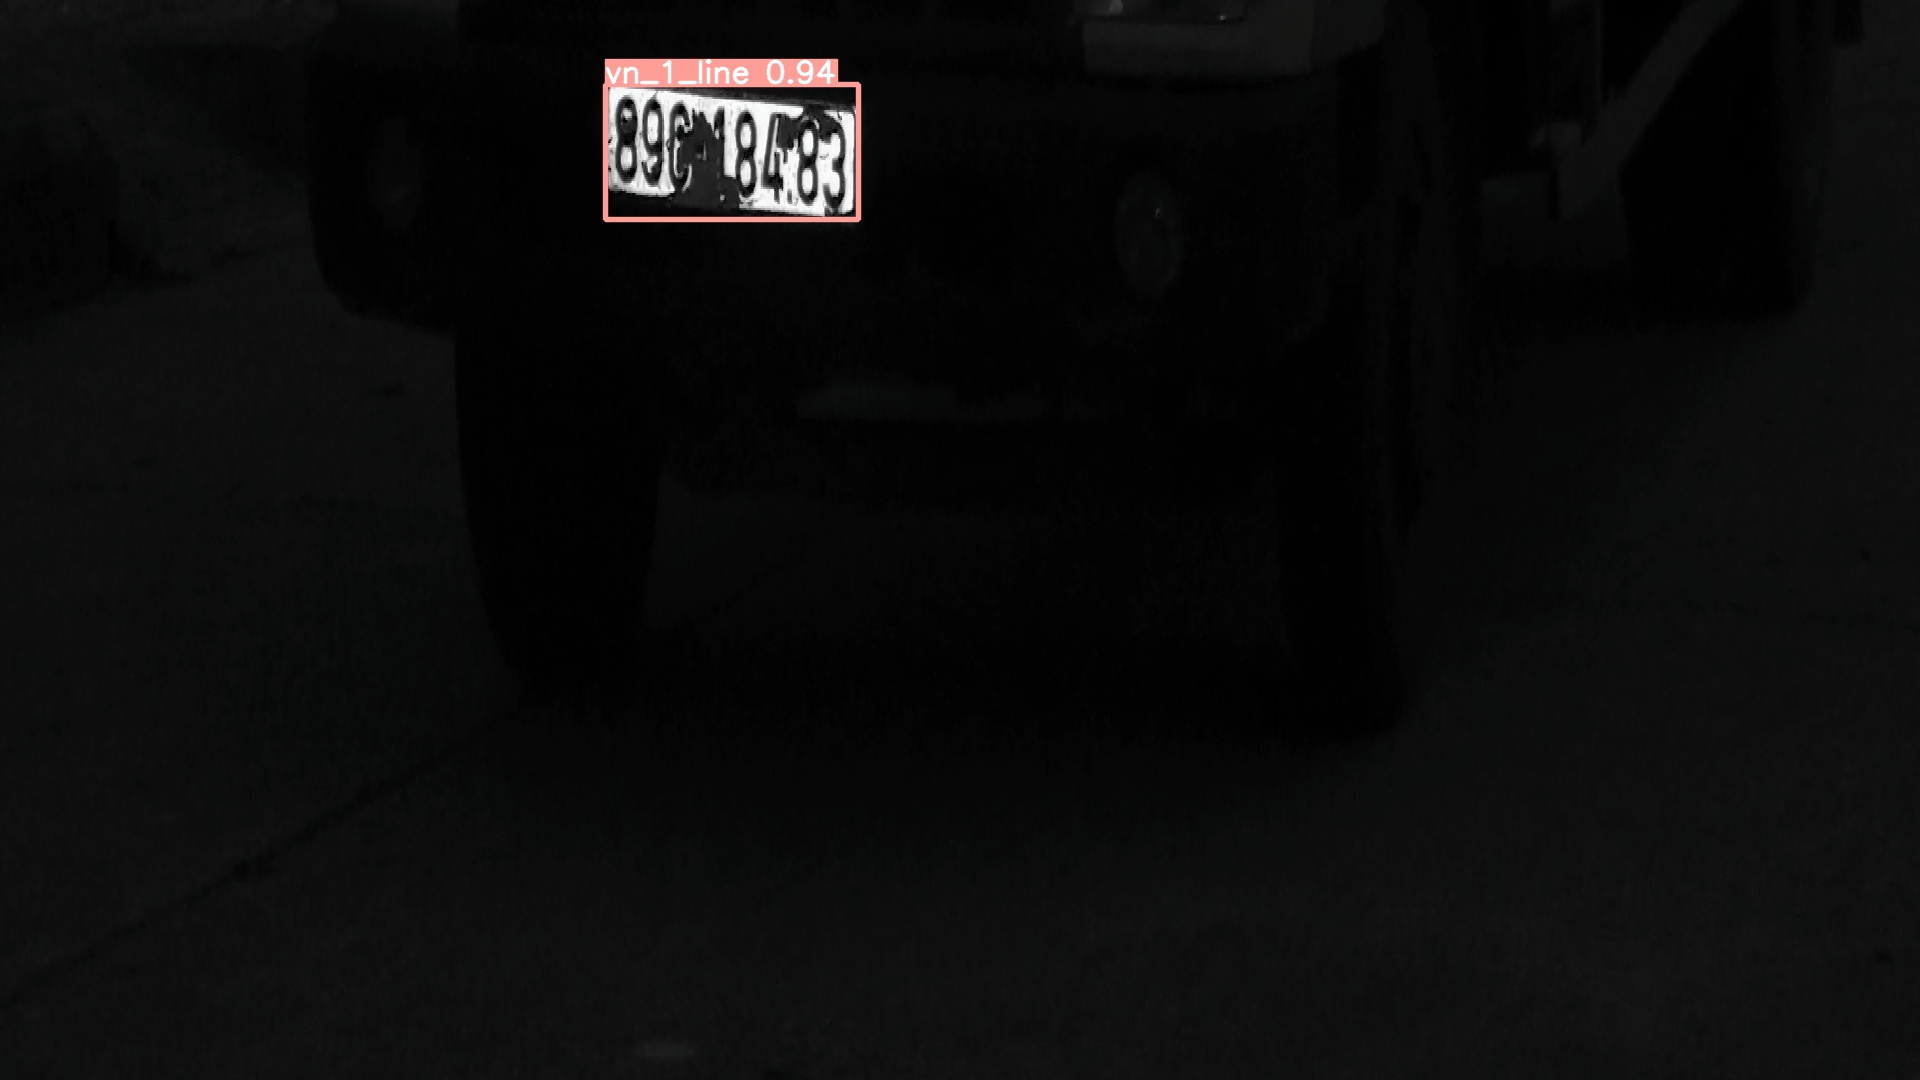

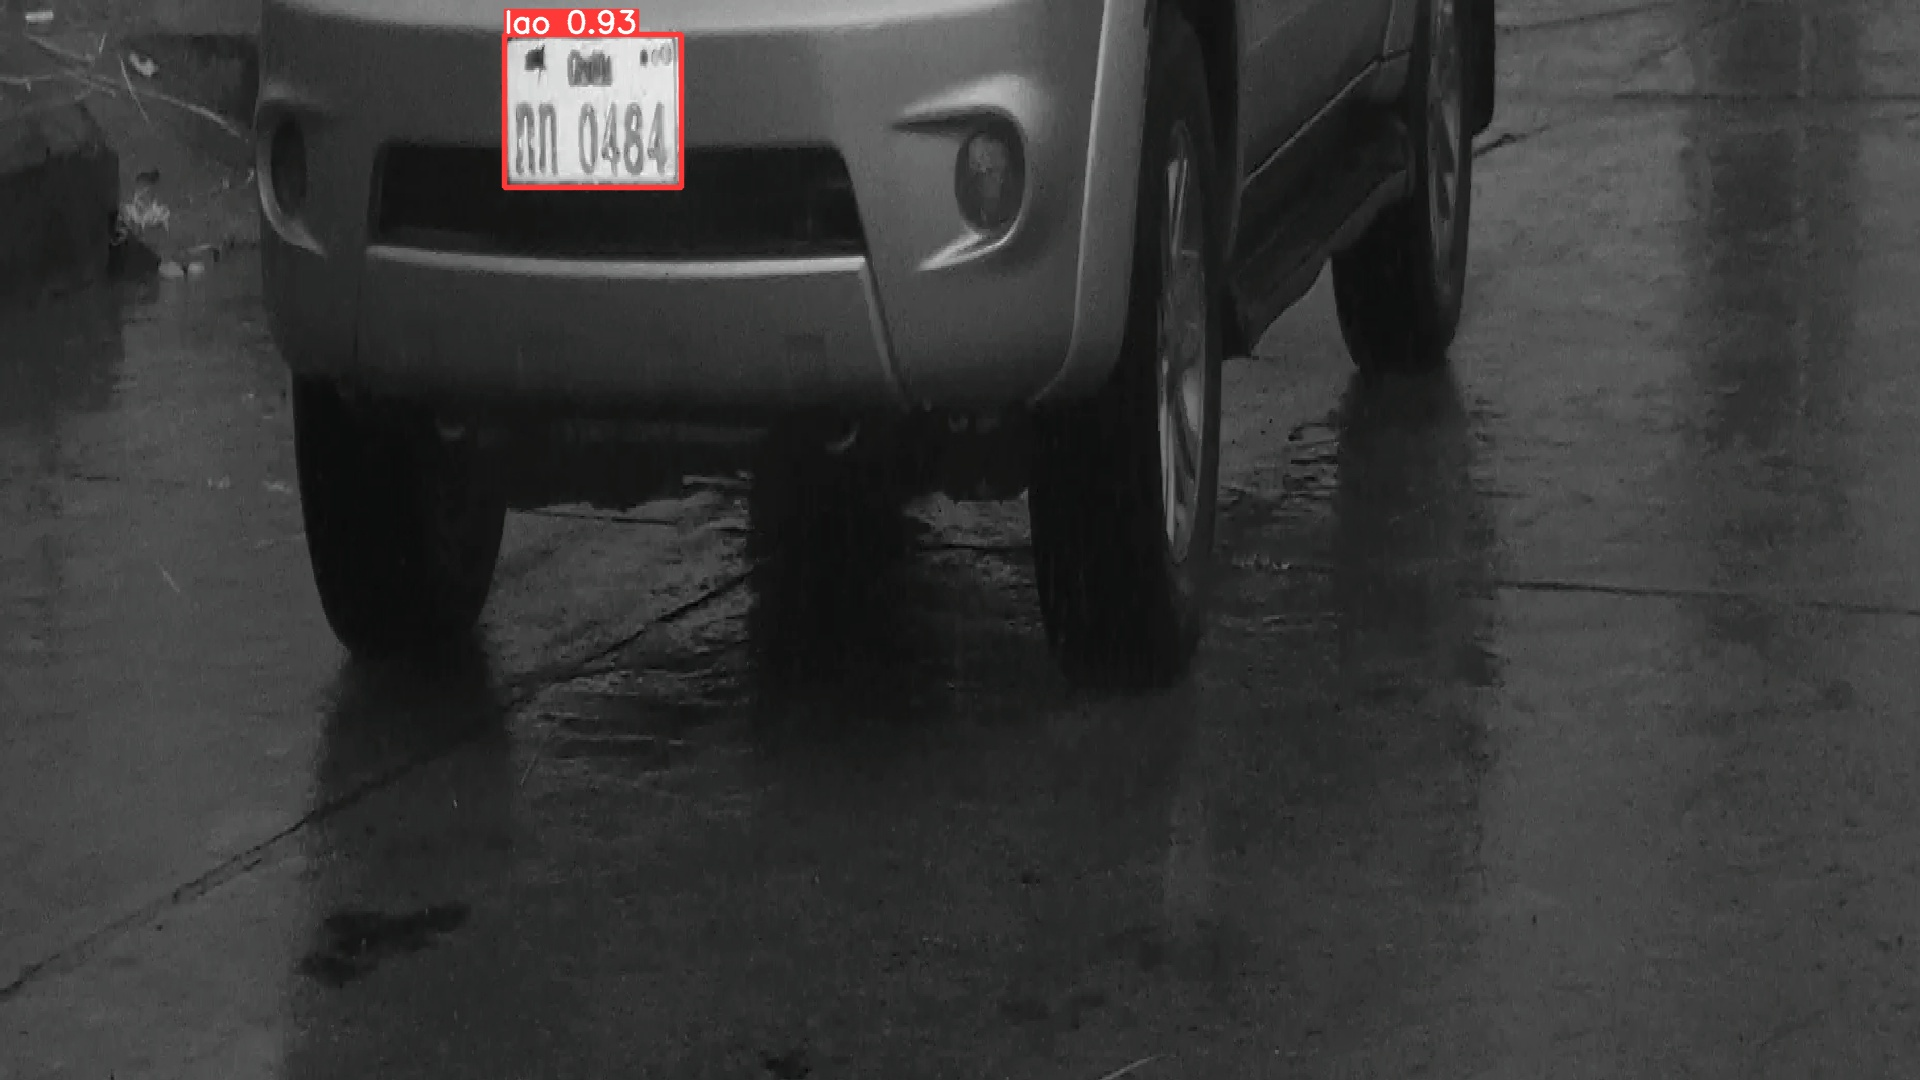

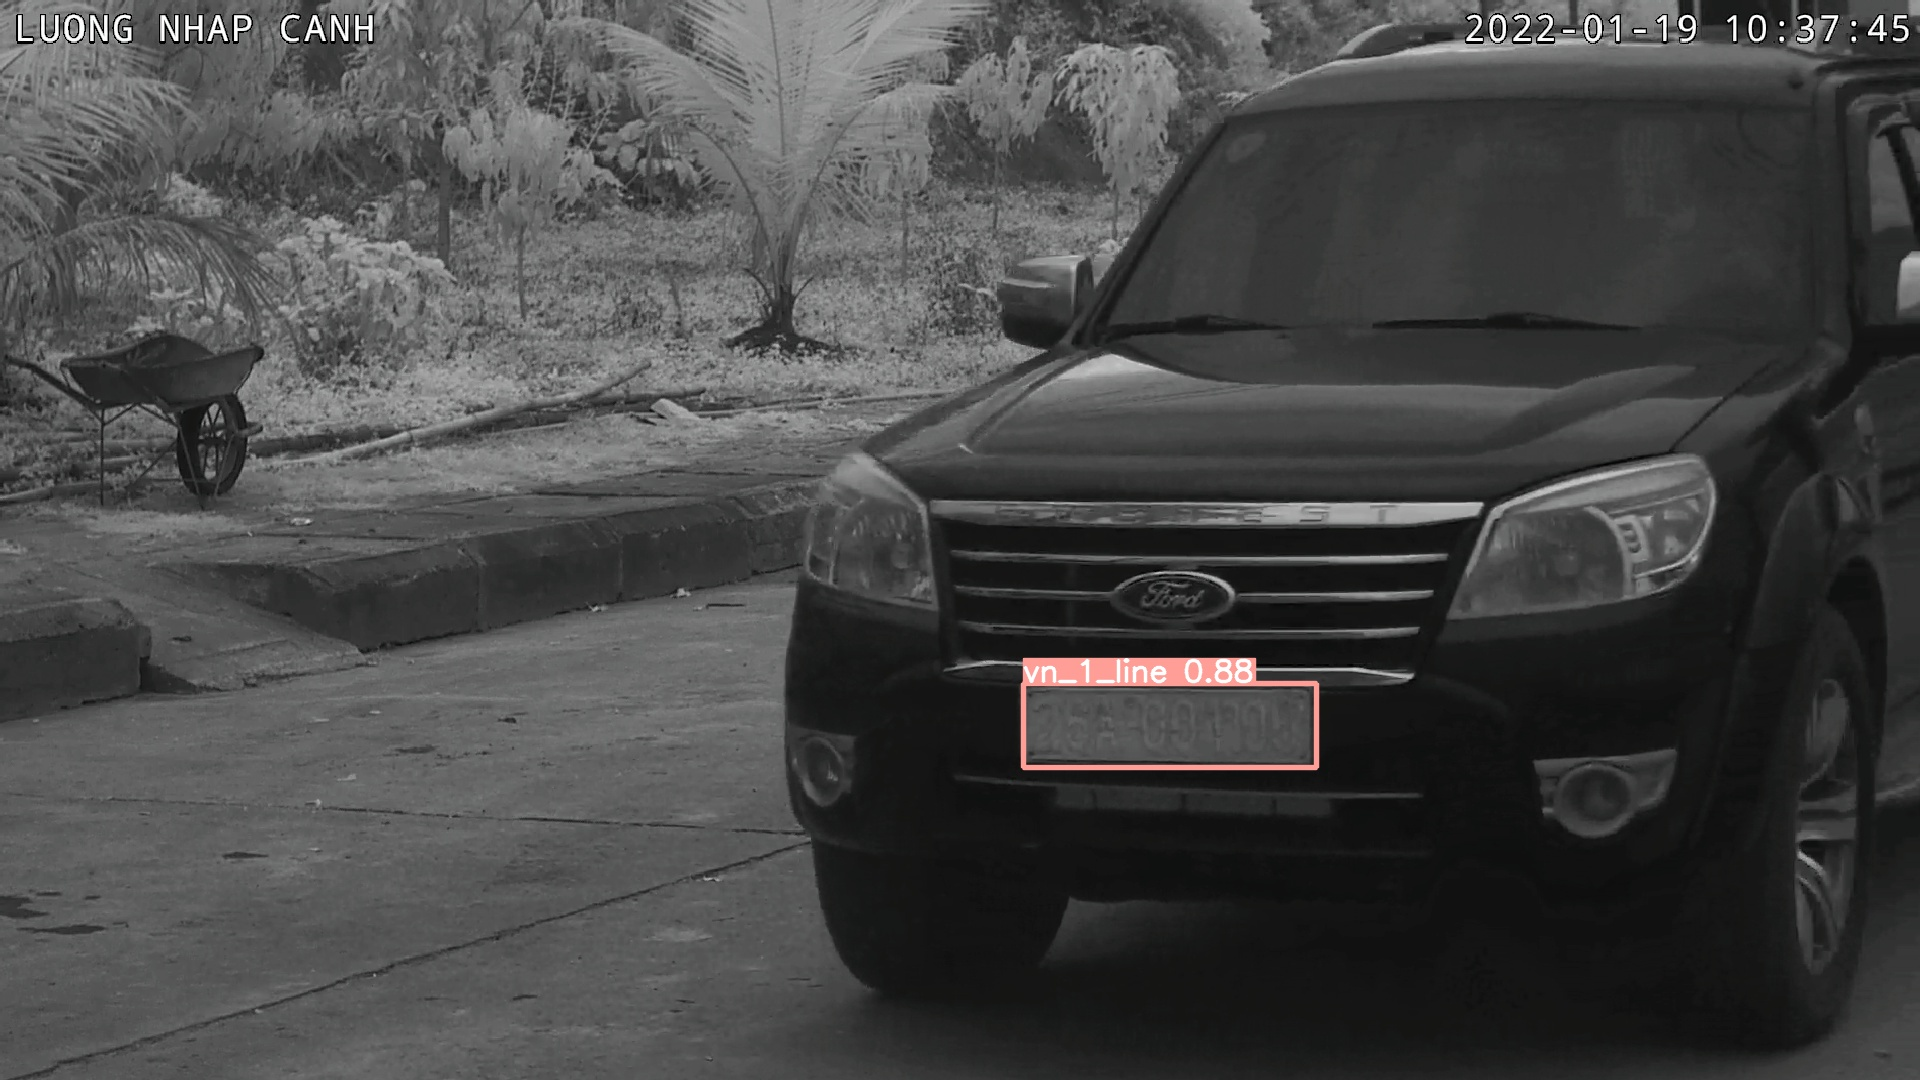

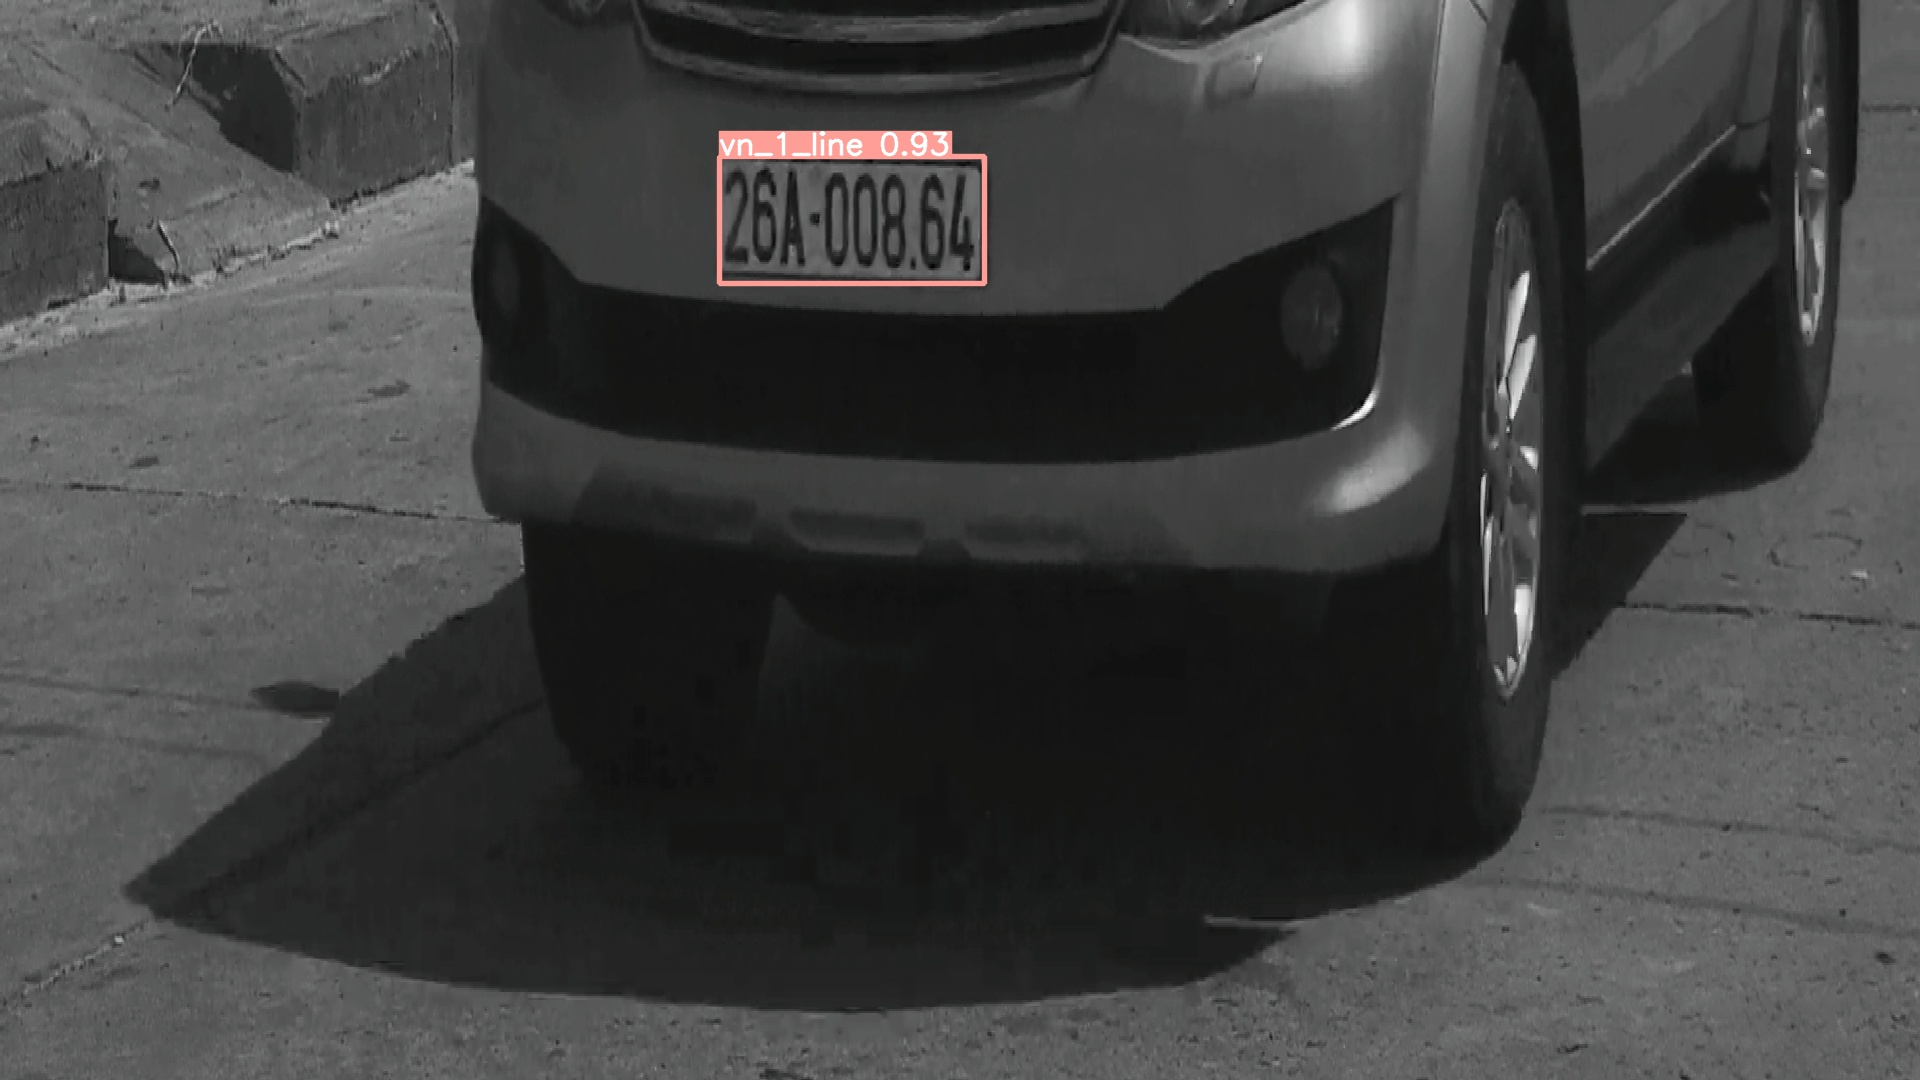

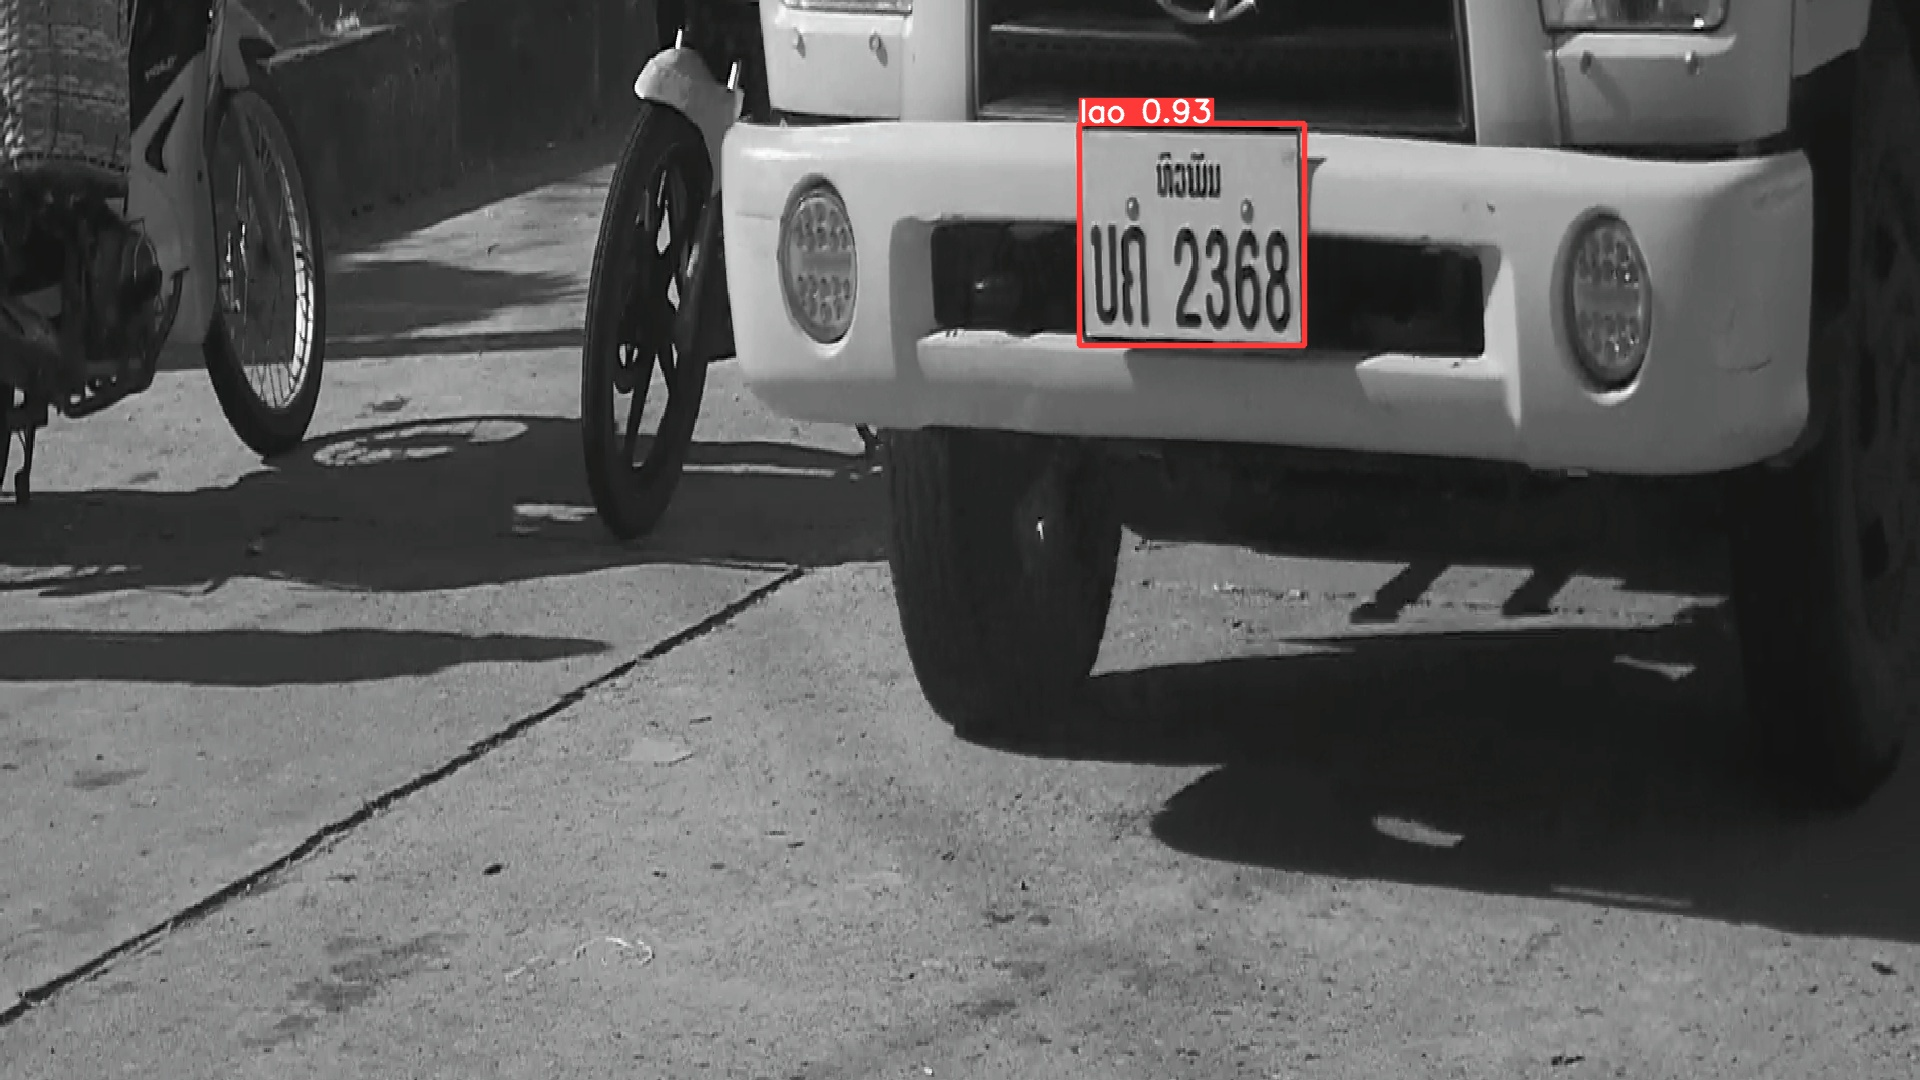

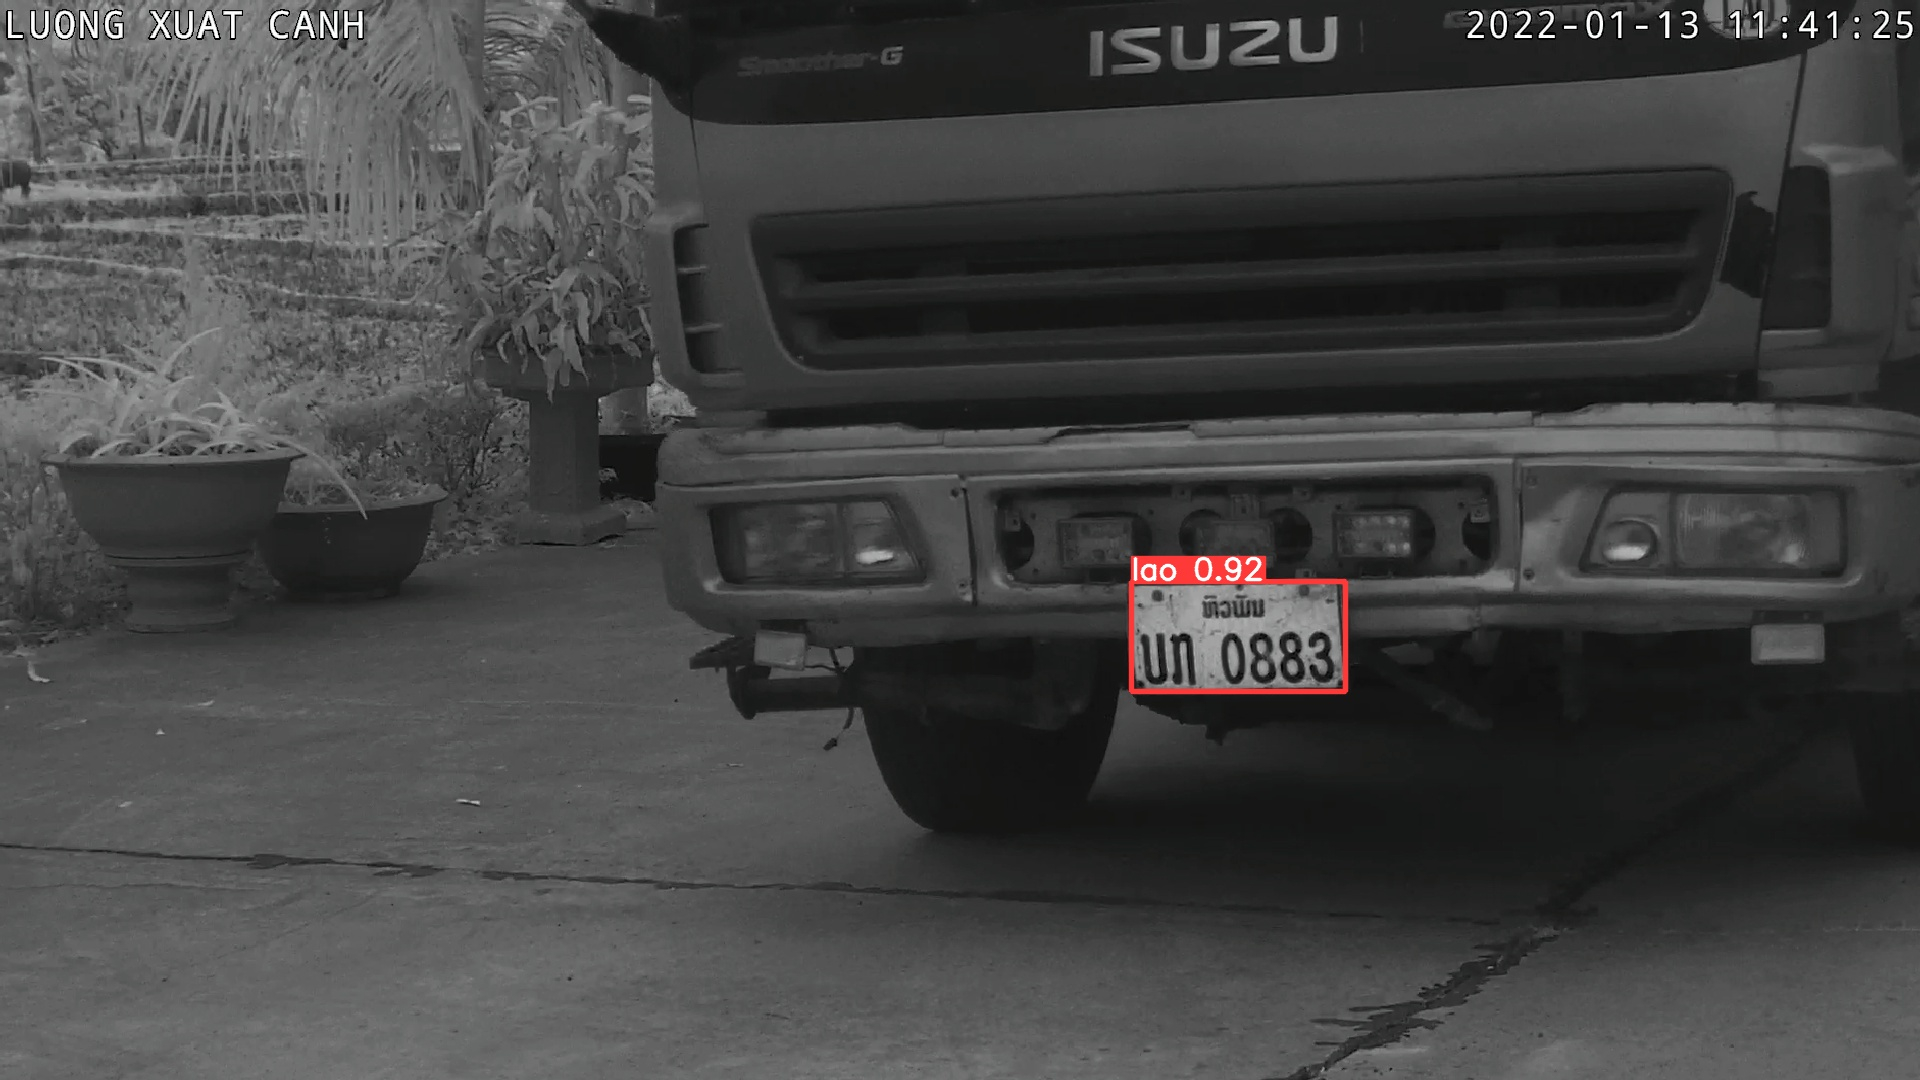

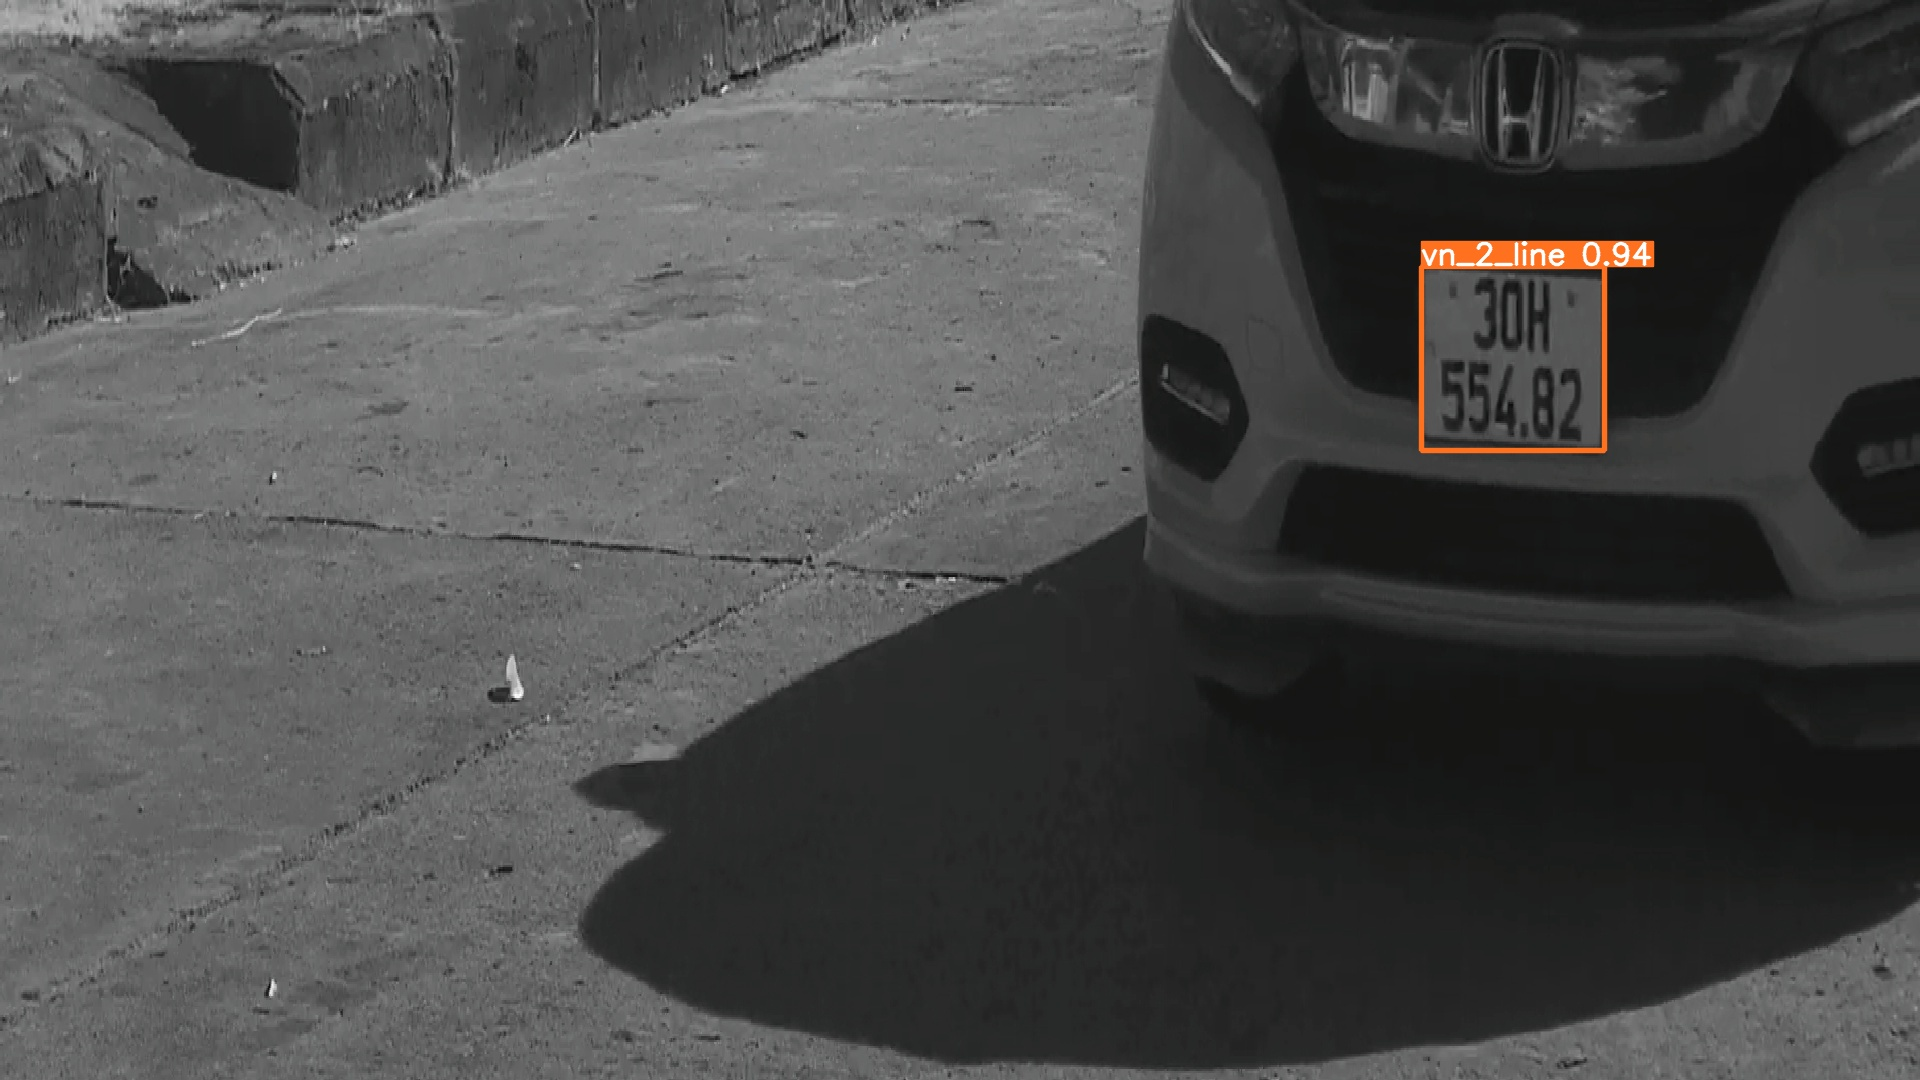

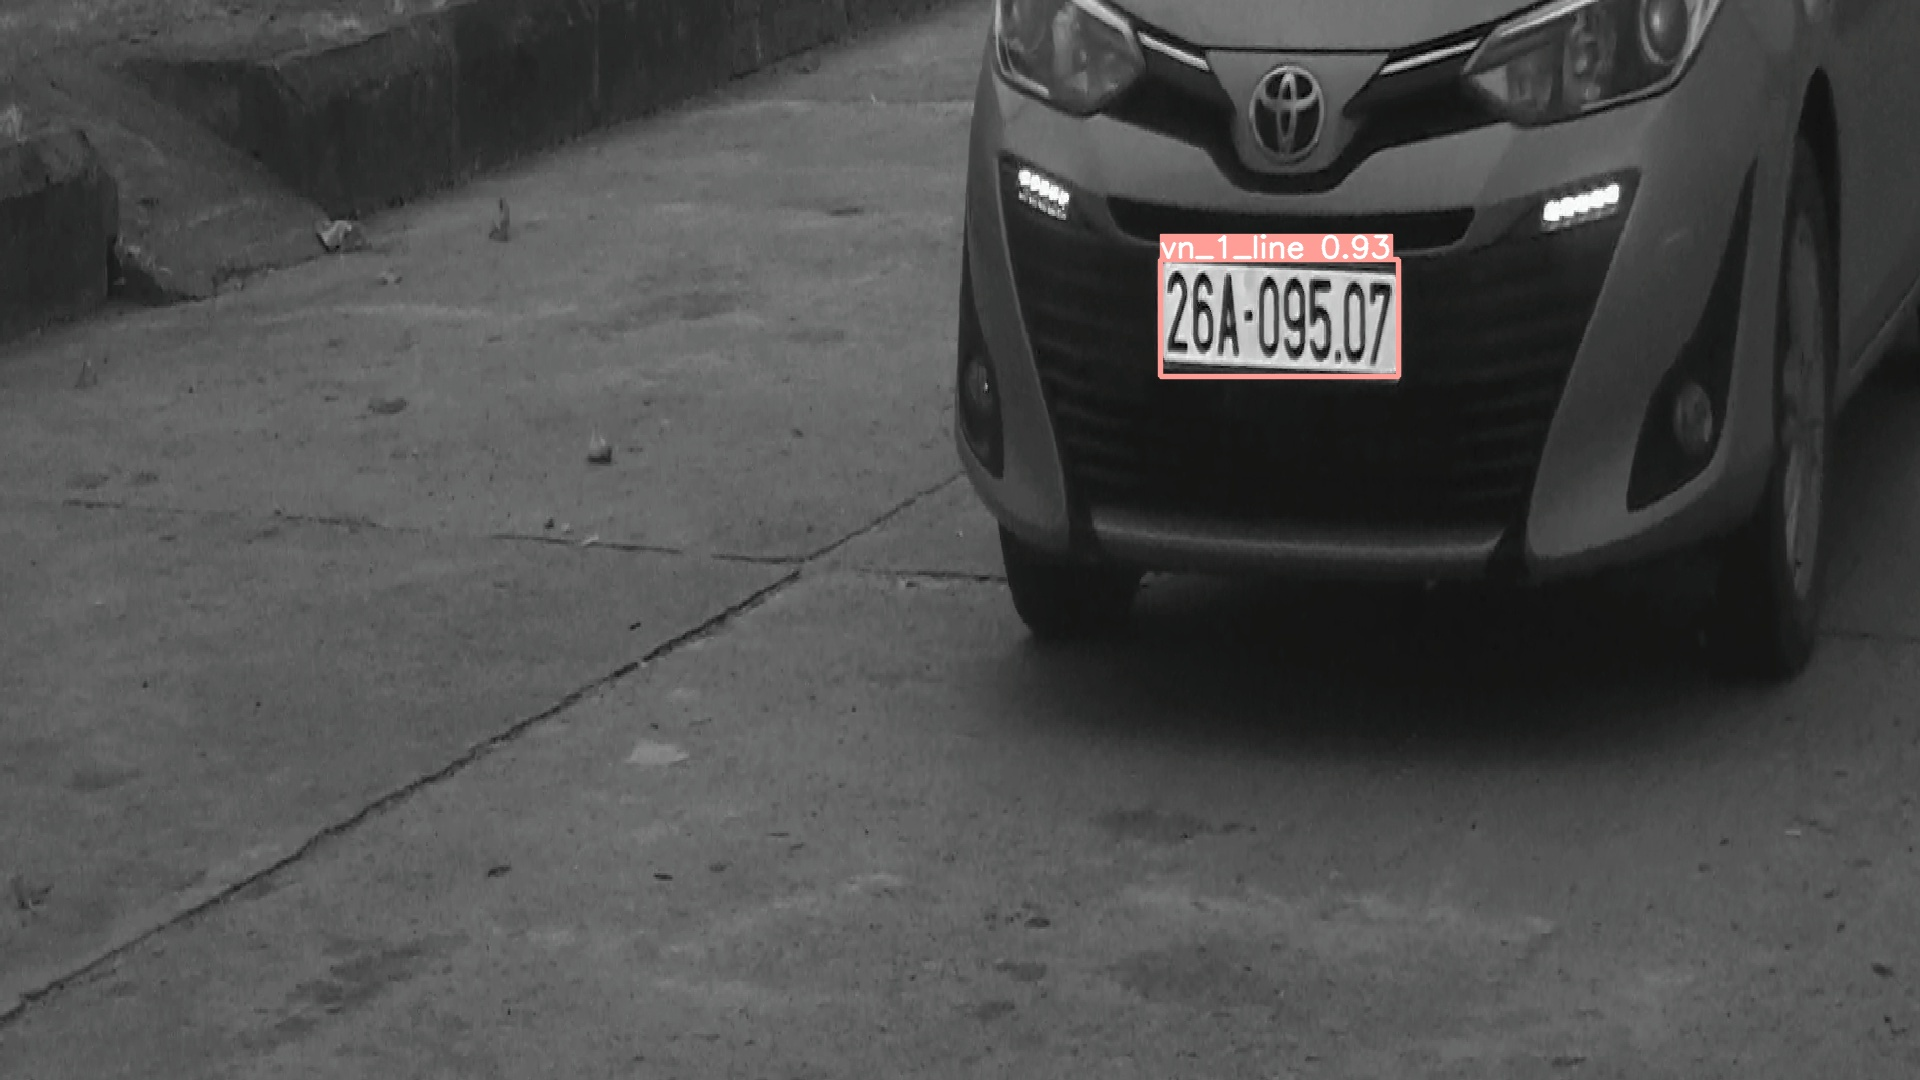

In [29]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

## [In-progress] Deploy model on something

## [Archive] Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

## Prediction Offline

In [ ]:
# Load model 

# Choose random test set image
import os, random 
test_set_loc = ""
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
